In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib as mpl
import VBBinaryLensing

mpl.rc('font',**{'family':'serif','serif':['Palatino']})
mpl.rc('text', usetex=True)
mpl.rcParams['axes.labelsize'] = 20
mpl.rcParams['xtick.labelsize'] = 20
mpl.rcParams['ytick.labelsize'] = 20
mpl.rcParams['axes.titlesize'] = 20

%matplotlib inline

# Better looking figures
%config InlineBackend.figure_format = 'retina'

In [2]:
# Initialize VBBinaryLensing() class object, set relative accuracy
VBBL = VBBinaryLensing.VBBinaryLensing()
VBBL.RelTol = 1e-03

In [3]:
t  =  np.linspace(7000, 7300, 500)

s = 1.2 # separation between the two lenses in units of total ang. Einstein radii
q = 0.5 # mass ratio: mass of the lens on the right divided by mass of the lens on the left
rho = 0.01 # source radius in Einstein radii of the total mass.
alpha = 0.93 # angle between lens axis and source trajectory
tE = 100.3 # einstein radius crossing time
t0 = 7154. # time of peak magnification
u0 = 0.2 # impact parameter

# Position of the center of the source with respect to the center of mass.
tau = (t - t0)/tE
y1 = -u0*np.sin(alpha) + tau*np.cos(alpha)
y2 = u0*np.cos(alpha) + tau*np.sin(alpha)

mag = np.zeros(len(tau))

# Calculate the magnification at each time 
?VBBL.BinaryLightCurve

params = [np.log(s), np.log(q), u0, alpha, np.log(rho), np.log(tE), t0]
mag = VBBL.BinaryLightCurve(params, t, y1, y2)

Docstring:
Static binary lens light curve for a given set of parameters.
Uses the BinaryMag2 function.

Parameters
----------
params : list[float]
    List of parameters [log_s, log_q, u0, alpha, log_rho, log_tE, t0]
times : list[float] 
    Array of times at which the magnification is calculated.
y1 : list[float]
    x-position of the source in the source plane.
y2 : list[float]
    y-position of the source in the source plane.

Returns
-------
mags: list[float] 
    Magnification array.
Type:      method


In [4]:
# Calculate the cirtical curves and the caustic curves
solutions = VBBL.PlotCrit(s, q) # Returns _sols object containing n crit. curves followed by n caustic curves
print(type(solutions))

<class 'VBBinaryLensing._sols'>


In [5]:
# generator function iterating over _sols, _curve, or _point objects 
# making use of the next keyword
def iterate_from(item):
    while item is not None:
        yield item
        item = item.next

curves = []
for curve in iterate_from(solutions.first):
    for point in iterate_from(curve.first):
        curves.append((point.x1, point.x2))
        
critical_curves = np.array(curves[:int(len(curves)/2)])
caustic_curves = np.array(curves[int(len(curves)/2):])

(-1, 1)

/home/fran/anaconda3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


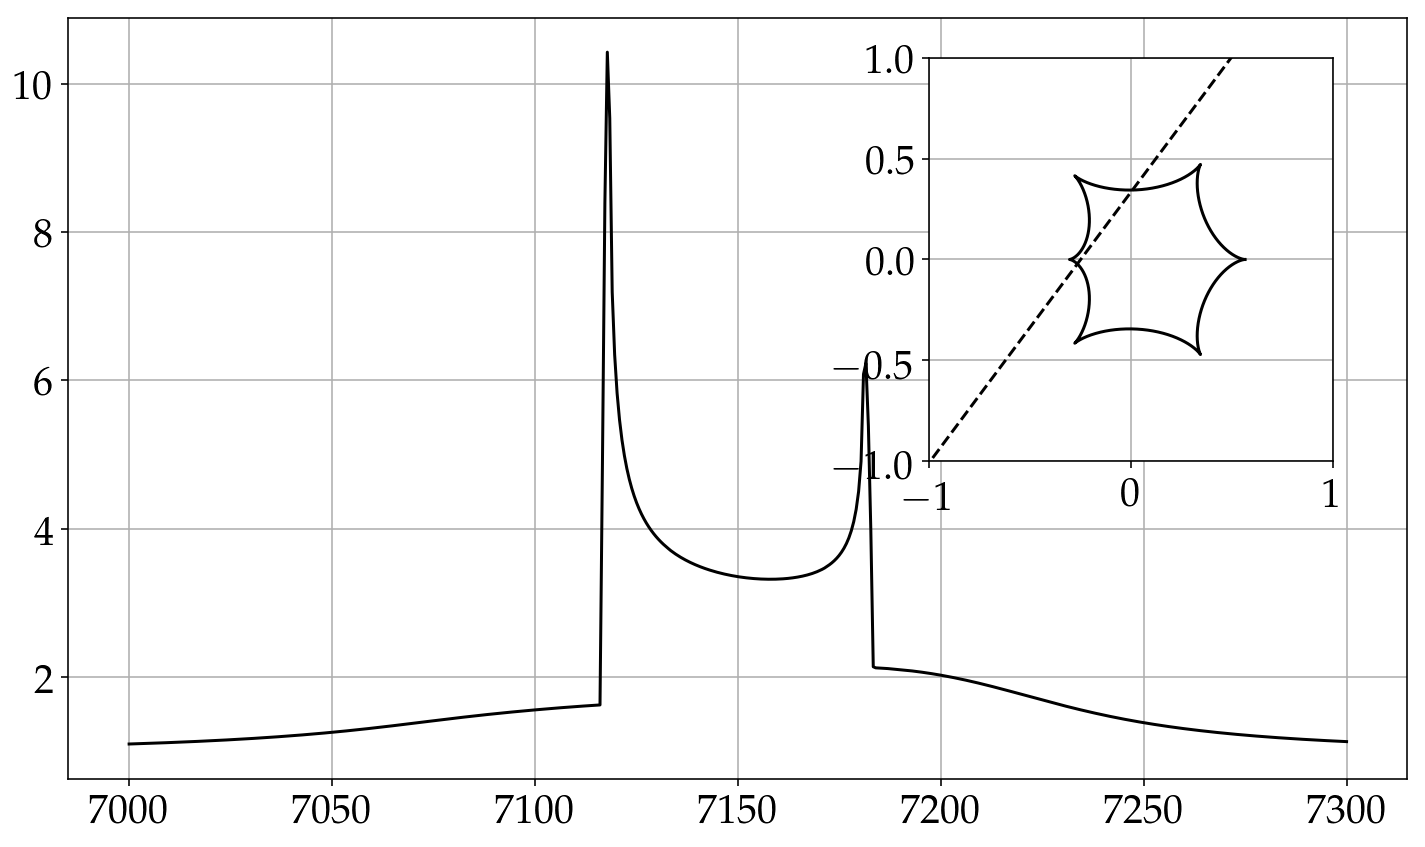

In [6]:
fig, ax = plt.subplots(figsize=(12,7))
ax.plot(t, mag, 'k-')
ax.grid(True)

ax2 = fig.add_axes([.54, .44, .4, .4], aspect=1)
ax2.plot(caustic_curves[:, 0], caustic_curves[:, 1], 'k-')
ax2.plot(y1, y2, 'k--')
ax2.grid(True)
ax2.set_xlim(-1,1)
ax2.set_ylim(-1,1)